# Install and Import Packages

In [1]:
%pip install jupysql --upgrade duckdb-engine pandas plotly seaborn matplotlib ipywidgets --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sql.ggplot import ggplot, aes, geom_boxplot, geom_histogram, facet_wrap
import ipywidgets as widgets
from ipywidgets import interact

In [3]:
# Loading in SQL extension
%reload_ext sql
# Initiating a DuckDB database named 'car_data.duckdb' to run SQL queries
%sql duckdb:///../data/database/car_data.duckdb

# Exploring the Data

In [4]:
%sql select * from fuel

Running query in 'duckdb:///../data/database/car_data.duckdb'

model_year,make_,model,vehicleclass_,enginesize_l,cylinders_,transmission_,fuel_type,fuelconsumption_city_l_100km,fuelconsumption_hwy_l_100km,fuelconsumption_comb_l_100km,fuelconsumption_comb_mpg,co2emissions_g_km,co2_rating,smog_rating,transmission_type,number_of_gears,mapped_fuel_type,type_of_wheel_drive,id,vehicle_type
2023,acura,integra,full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39,167,6,7,continuously variable,7,premium gasoline,unspecified,1,fuel-only
2023,acura,integra a-spec,full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38,172,6,7,continuously variable,7,premium gasoline,unspecified,2,fuel-only
2023,acura,integra a-spec,full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36,181,6,6,manual,6,premium gasoline,unspecified,3,fuel-only
2023,acura,mdx sh-awd,suv - small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25,263,4,5,automatic with select Shift,10,premium gasoline,All-wheel drive,4,fuel-only
2023,acura,mdx sh-awd type s,suv - standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23,291,4,5,automatic with select Shift,10,premium gasoline,All-wheel drive,5,fuel-only
2023,acura,rdx sh-awd,suv - small,2.0,4.0,AS10,Z,11.0,8.6,9.9,29,232,5,6,automatic with select Shift,10,premium gasoline,All-wheel drive,6,fuel-only
2023,acura,rdx sh-awd a-spec,suv - small,2.0,4.0,AS10,Z,11.3,9.1,10.3,27,242,5,6,automatic with select Shift,10,premium gasoline,All-wheel drive,7,fuel-only
2023,acura,tlx sh-awd,compact,2.0,4.0,AS10,Z,11.2,8.0,9.8,29,230,5,7,automatic with select Shift,10,premium gasoline,All-wheel drive,8,fuel-only
2023,acura,tlx sh-awd a-spec,compact,2.0,4.0,AS10,Z,11.3,8.1,9.8,29,231,5,7,automatic with select Shift,10,premium gasoline,All-wheel drive,9,fuel-only
2023,acura,tlx type s,compact,3.0,6.0,AS10,Z,12.3,9.4,11.0,26,256,5,5,automatic with select Shift,10,premium gasoline,unspecified,10,fuel-only


In [5]:
%sql select * from electric

Running query in 'duckdb:///../data/database/car_data.duckdb'

model_year,make_,model,vehicleclass_,motor_kw,transmission_,fuel_type,consumption_city_kwh_100km,fuelconsumption_hwy_kwh_100km,fuelconsumption_comb_kwh_100km,fuelconsumption_city_le_100km,fuelconsumption_hwy_le_100km,fuelconsumption_comb_le_100km,range1_km,co2emissions_g_km,co2_rating,smog_rating,recharge_time_h,transmission_type,number_of_gears,mapped_fuel_type,id,vehicle_type
2012,mitsubishi,i-miev,subcompact,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100,0,None,None,7.0,automatic,1,electricity,1,electric
2012,nissan,leaf,mid-size,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117,0,None,None,7.0,automatic,1,electricity,2,electric
2013,ford,focus electric,compact,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,122,0,None,None,4.0,automatic,1,electricity,3,electric
2013,mitsubishi,i-miev,subcompact,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,100,0,None,None,7.0,automatic,1,electricity,4,electric
2013,nissan,leaf,mid-size,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,117,0,None,None,7.0,automatic,1,electricity,5,electric
2013,smart,fortwo electric drive cabriolet,two-seater,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,109,0,None,None,8.0,automatic,1,electricity,6,electric
2013,smart,fortwo electric drive coupe,two-seater,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,109,0,None,None,8.0,automatic,1,electricity,7,electric
2013,tesla,model s (40 kwh),full-size,225,A1,B,22.4,21.9,22.2,2.5,2.5,2.5,224,0,None,None,6.0,automatic,1,electricity,8,electric
2013,tesla,model s (60 kwh),full-size,225,A1,B,22.2,21.7,21.9,2.5,2.4,2.5,335,0,None,None,10.0,automatic,1,electricity,9,electric
2013,tesla,model s (85 kwh),full-size,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,426,0,None,None,12.0,automatic,1,electricity,10,electric


In [6]:
%sql select * from hybrid

Running query in 'duckdb:///../data/database/car_data.duckdb'

model_year,make_,model,vehicleclass_,motor_kw,enginesize_l,cylinders_,transmission_,fuel_type1,consumption_combinedle_100km,range1_km,recharge_time_h,fuel_type2,fuelconsumption_city_l_100km,fuelconsumption_hwy_l_100km,fuelconsumption_comb_l_100km,range2_km,co2emissions_g_km,co2_rating,smog_rating,transmission_type,number_of_gears,mapped_fuel_type,hybrid_fuels,id,vehicle_type
2012,chevrolet,volt,compact,111,1.4,4.0,AV,B,2.5 (22.3 kWh/100 km),56,4.0,Z,6.7,5.9,6.4,550,54,None,None,continuously variable,None,premium gasoline,electricity,1,hybrid
2013,chevrolet,volt,compact,111,1.4,4.0,AV,B,2.4 (21.4 kWh/100 km),61,4.0,Z,6.7,5.9,6.4,550,45,None,None,continuously variable,None,premium gasoline,electricity,2,hybrid
2013,ford,c-max energi,mid-size,35,2.0,4.0,AV,B/X,2.7 ([23.2 kWh + 0.1 L]/100 km),32,2.5,X,5.8,6.5,6.1,856,80,None,None,continuously variable,None,regular gasoline,electricity & regular gasoline,3,hybrid
2013,ford,fusion energi,mid-size,35,2.0,4.0,AV,B/X,2.7 ([23.2 kWh + 0.1 L]/100 km),32,2.5,X,5.8,6.5,6.1,856,80,None,None,continuously variable,None,regular gasoline,electricity & regular gasoline,4,hybrid
2013,toyota,prius plug-in hybrid,mid-size,60,1.8,4.0,AV,B/X,2.5 ([18.0 kWh + 0.4 L]/100 km),18,1.5,X,4.7,4.8,4.7,845,101,None,None,continuously variable,None,regular gasoline,electricity & regular gasoline,5,hybrid
2014,cadillac,elr,compact,117,1.4,4.0,AV,B,2.9 (25.3 kWh/100 km),59,5.0,Z,7.6,6.7,7.2,493,50,None,None,continuously variable,None,premium gasoline,electricity,6,hybrid
2014,chevrolet,volt,compact,111,1.4,4.0,AV,B,2.4 (21.4 kWh/100 km),61,4.0,Z,6.7,5.9,6.4,550,45,None,None,continuously variable,None,premium gasoline,electricity,7,hybrid
2014,ford,c-max energi,mid-size,35,2.0,4.0,AV,B/X,2.7 ([23.2 kWh + 0.1 L]/100 km),32,2.5,X,5.8,6.5,6.1,856,80,None,None,continuously variable,None,regular gasoline,electricity & regular gasoline,8,hybrid
2014,ford,fusion energi,mid-size,35,2.0,4.0,AV,B/X,2.7 ([23.2 kWh + 0.1 L]/100 km),32,2.5,X,5.8,6.5,6.1,856,80,None,None,continuously variable,None,regular gasoline,electricity & regular gasoline,9,hybrid
2014,porsche,panamera s e-hybrid,full-size,71,3.0,6.0,A8,B/Z,4.6 ([31.7 kWh + 1.0 L]/100 km),26,3.0,Z,10.4,8.0,9.3,871,142,None,None,automatic,8,premium gasoline,electricity & premium gasoline,10,hybrid


In [21]:
%sql select * from all_vehicles

Running query in 'duckdb:///../data/database/car_data.duckdb'

enginesize_l,vehicle_type,id,consumption_combinedle_100km,range2_km,cylinders_,mapped_fuel_type,fuelconsumption_comb_l_100km,range1_km,transmission_type,fuelconsumption_comb_le_100km,transmission_,model,fuel_type2,fuelconsumption_hwy_le_100km,co2_rating,fuel_type1,model_year,make_,co2emissions_g_km,fuelconsumption_city_le_100km,fuelconsumption_hwy_kwh_100km,fuel_type,number_of_gears,recharge_time_h,smog_rating,consumption_city_kwh_100km,motor_kw,type_of_wheel_drive,fuelconsumption_hwy_l_100km,hybrid_fuels,fuelconsumption_city_l_100km,fuelconsumption_comb_mpg,vehicleclass_,fuelconsumption_comb_kwh_100km
1.5,fuel-only,1,None,None,4.0,premium gasoline,7.2,None,continuously variable,None,AV7,integra,None,None,6,None,2023,acura,167,None,None,Z,7,None,7,None,None,unspecified,6.3,None,7.9,39,full-size,None
1.5,fuel-only,2,None,None,4.0,premium gasoline,7.4,None,continuously variable,None,AV7,integra a-spec,None,None,6,None,2023,acura,172,None,None,Z,7,None,7,None,None,unspecified,6.5,None,8.1,38,full-size,None
1.5,fuel-only,3,None,None,4.0,premium gasoline,7.8,None,manual,None,M6,integra a-spec,None,None,6,None,2023,acura,181,None,None,Z,6,None,6,None,None,unspecified,6.5,None,8.9,36,full-size,None
3.5,fuel-only,4,None,None,6.0,premium gasoline,11.2,None,automatic with select Shift,None,AS10,mdx sh-awd,None,None,4,None,2023,acura,263,None,None,Z,10,None,5,None,None,All-wheel drive,9.4,None,12.6,25,suv - small,None
3.0,fuel-only,5,None,None,6.0,premium gasoline,12.4,None,automatic with select Shift,None,AS10,mdx sh-awd type s,None,None,4,None,2023,acura,291,None,None,Z,10,None,5,None,None,All-wheel drive,11.2,None,13.8,23,suv - standard,None
2.0,fuel-only,6,None,None,4.0,premium gasoline,9.9,None,automatic with select Shift,None,AS10,rdx sh-awd,None,None,5,None,2023,acura,232,None,None,Z,10,None,6,None,None,All-wheel drive,8.6,None,11.0,29,suv - small,None
2.0,fuel-only,7,None,None,4.0,premium gasoline,10.3,None,automatic with select Shift,None,AS10,rdx sh-awd a-spec,None,None,5,None,2023,acura,242,None,None,Z,10,None,6,None,None,All-wheel drive,9.1,None,11.3,27,suv - small,None
2.0,fuel-only,8,None,None,4.0,premium gasoline,9.8,None,automatic with select Shift,None,AS10,tlx sh-awd,None,None,5,None,2023,acura,230,None,None,Z,10,None,7,None,None,All-wheel drive,8.0,None,11.2,29,compact,None
2.0,fuel-only,9,None,None,4.0,premium gasoline,9.8,None,automatic with select Shift,None,AS10,tlx sh-awd a-spec,None,None,5,None,2023,acura,231,None,None,Z,10,None,7,None,None,All-wheel drive,8.1,None,11.3,29,compact,None
3.0,fuel-only,10,None,None,6.0,premium gasoline,11.0,None,automatic with select Shift,None,AS10,tlx type s,None,None,5,None,2023,acura,256,None,None,Z,10,None,5,None,None,unspecified,9.4,None,12.3,26,compact,None


# Queries to explore

1. Bar plot with three groups (fuel, hybrid, electric). X axis is `model_year` and y axis is `num_vehicles`. This way we can examine car manufacturing trends - ggplot API
2. Scatter plot of electric vehicle ranges and charging time (by vehicle class?)- seaborn 
3. Bar plot with three groups (fuel, hybrid, electric). X axis is `vehicleclass_` and y axis is `num_vehicles`. 
4. Bubble plot of fuel vehicles, x axis is `co2emissions_g(g/km)`, y axis is `fuelconsumption_comb(mpg)`, and bubble size is `enginesize_(l)`
5. Boxplot for statistical comparison of `fuelconsumption_city` across all three groups (fuel, hybrid, electric) -> tough to do in a single CTE because of the different column names. Could do it separately (1 boxplot for each group) or look at another variable.

## Query 1

## CTE

In [10]:
%%sql --save query_1_bar
SELECT DISTINCT model_year, vehicle_type, COUNT(id) AS num_vehicles
FROM all_vehicles
GROUP BY model_year, vehicle_type
ORDER BY model_year;

Running query in 'duckdb:///../data/database/car_data.duckdb'

model_year,vehicle_type,num_vehicles
1995,fuel-only,839
1996,fuel-only,698
1997,fuel-only,658
1998,fuel-only,634
1999,fuel-only,688
2000,fuel-only,638
2001,fuel-only,679
2002,fuel-only,740
2003,fuel-only,820
2004,fuel-only,898


Save the CTE as a pandas `DataFrame()`:

In [12]:
result = %sql SELECT * FROM query_1_bar
df = result.DataFrame()

Generating CTE with stored snippets : 'query_1_bar'

Running query in 'duckdb:///../data/database/car_data.duckdb'

## Viz

Finally, use `seaborn.barplot()`, this time with the hue argument, to produce a grouped bar plot:

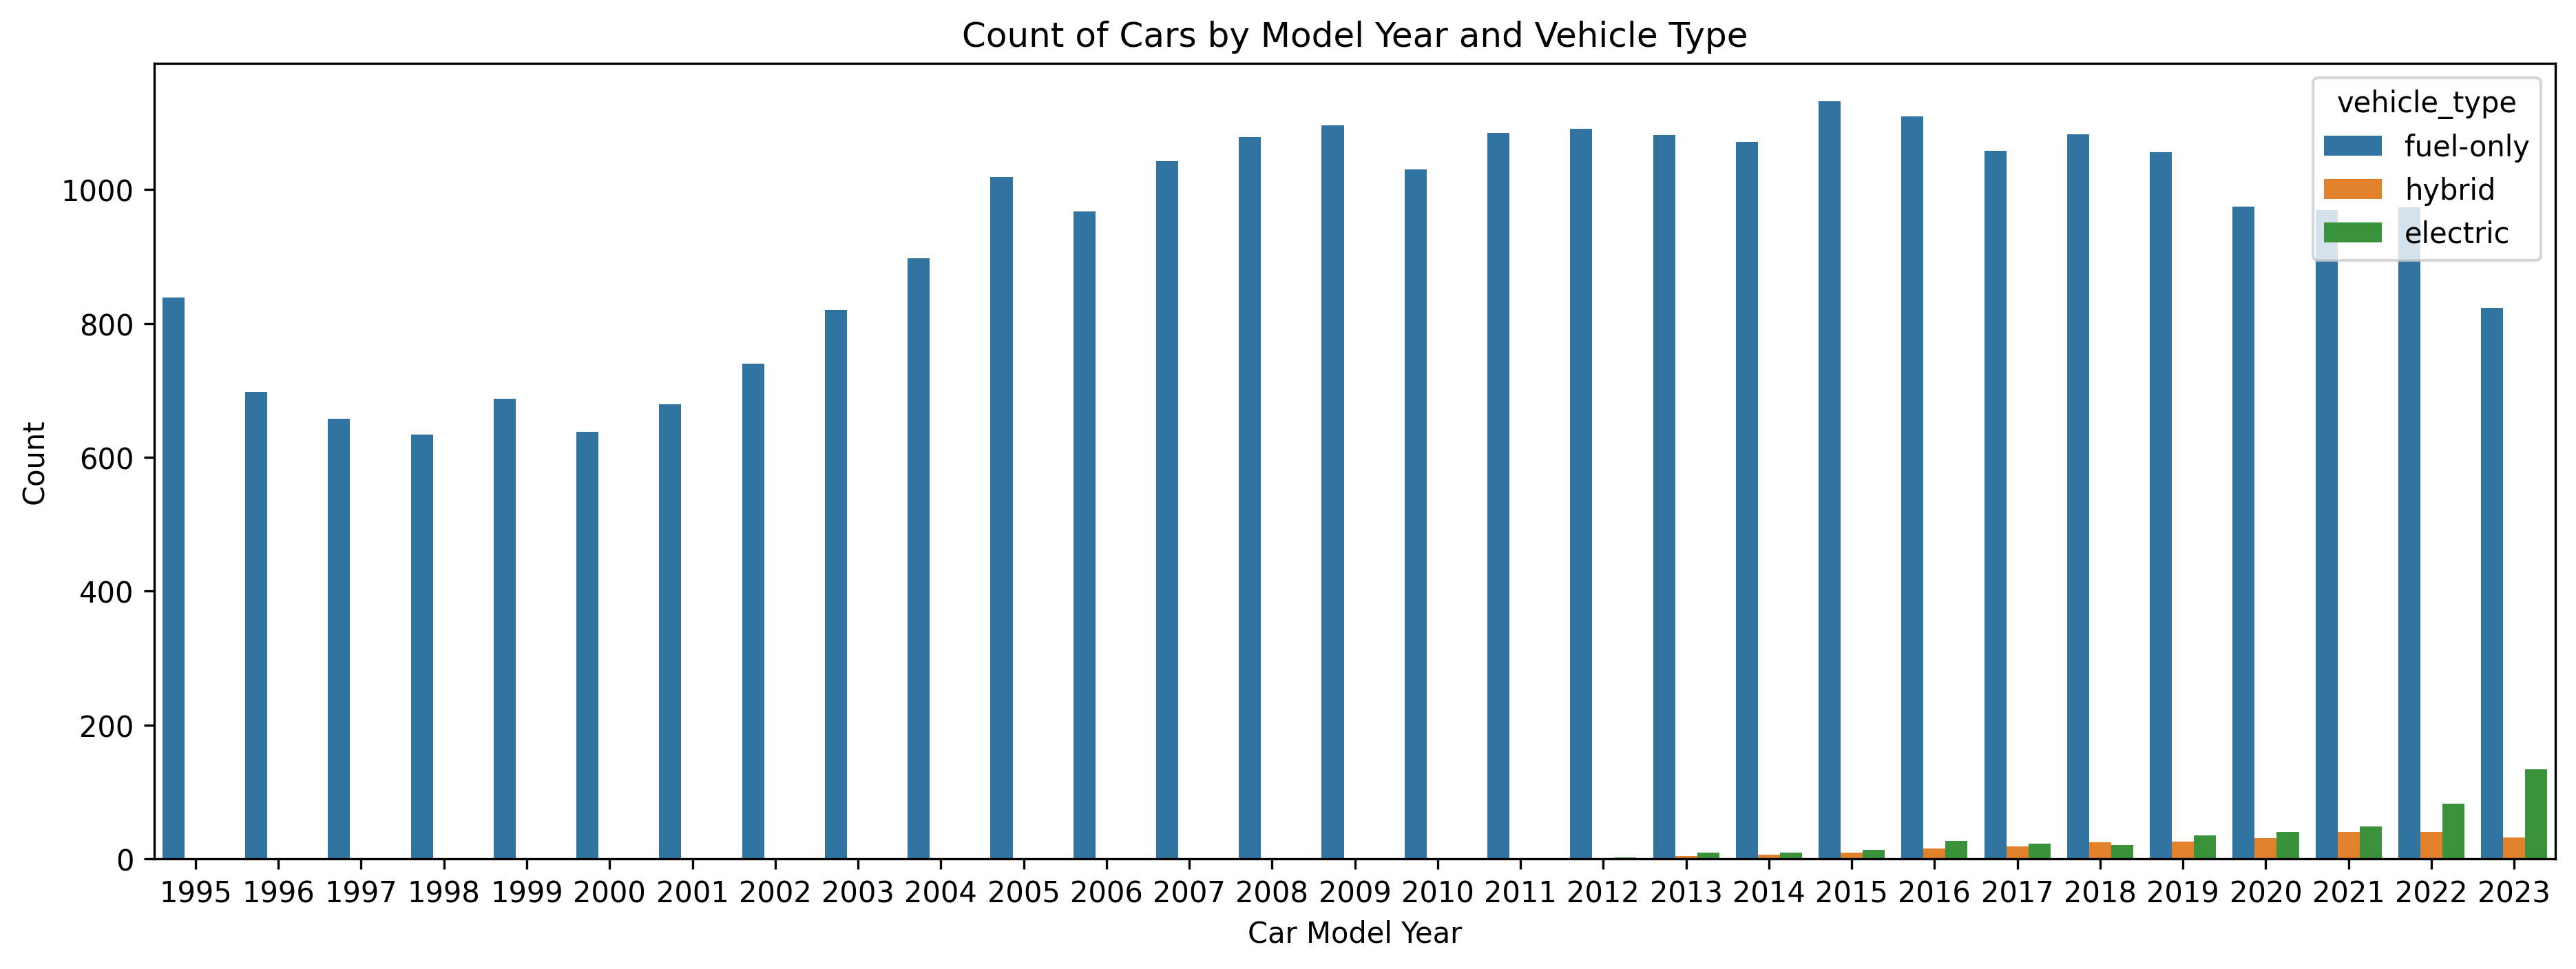

In [14]:
plt.figure(figsize=(15, 5), dpi=300)  # Initialize blank canvas
sns.barplot(data=df, x="model_year", y="num_vehicles", hue="vehicle_type")
plt.xlabel("Car Model Year")
plt.ylabel("Count")
plt.title("Count of Cars by Model Year and Vehicle Type")
plt.show()

# Query 2

## CTE

In [15]:
%%sql --save query_2_scatter
SELECT range1_km, recharge_time_h, vehicleclass_
FROM electric

Running query in 'duckdb:///../data/database/car_data.duckdb'

range1_km,recharge_time_h,vehicleclass_
100,7.0,subcompact
117,7.0,mid-size
122,4.0,compact
100,7.0,subcompact
117,7.0,mid-size
109,8.0,two-seater
109,8.0,two-seater
224,6.0,full-size
335,10.0,full-size
426,12.0,full-size


save the CTE as a pandas `DataFrame()`:

In [16]:
result = %sql SELECT * FROM query_2_scatter
df = result.DataFrame()

Generating CTE with stored snippets : 'query_2_scatter'

Running query in 'duckdb:///../data/database/car_data.duckdb'

## Viz

<class 'matplotlib.axes._axes.Axes'>


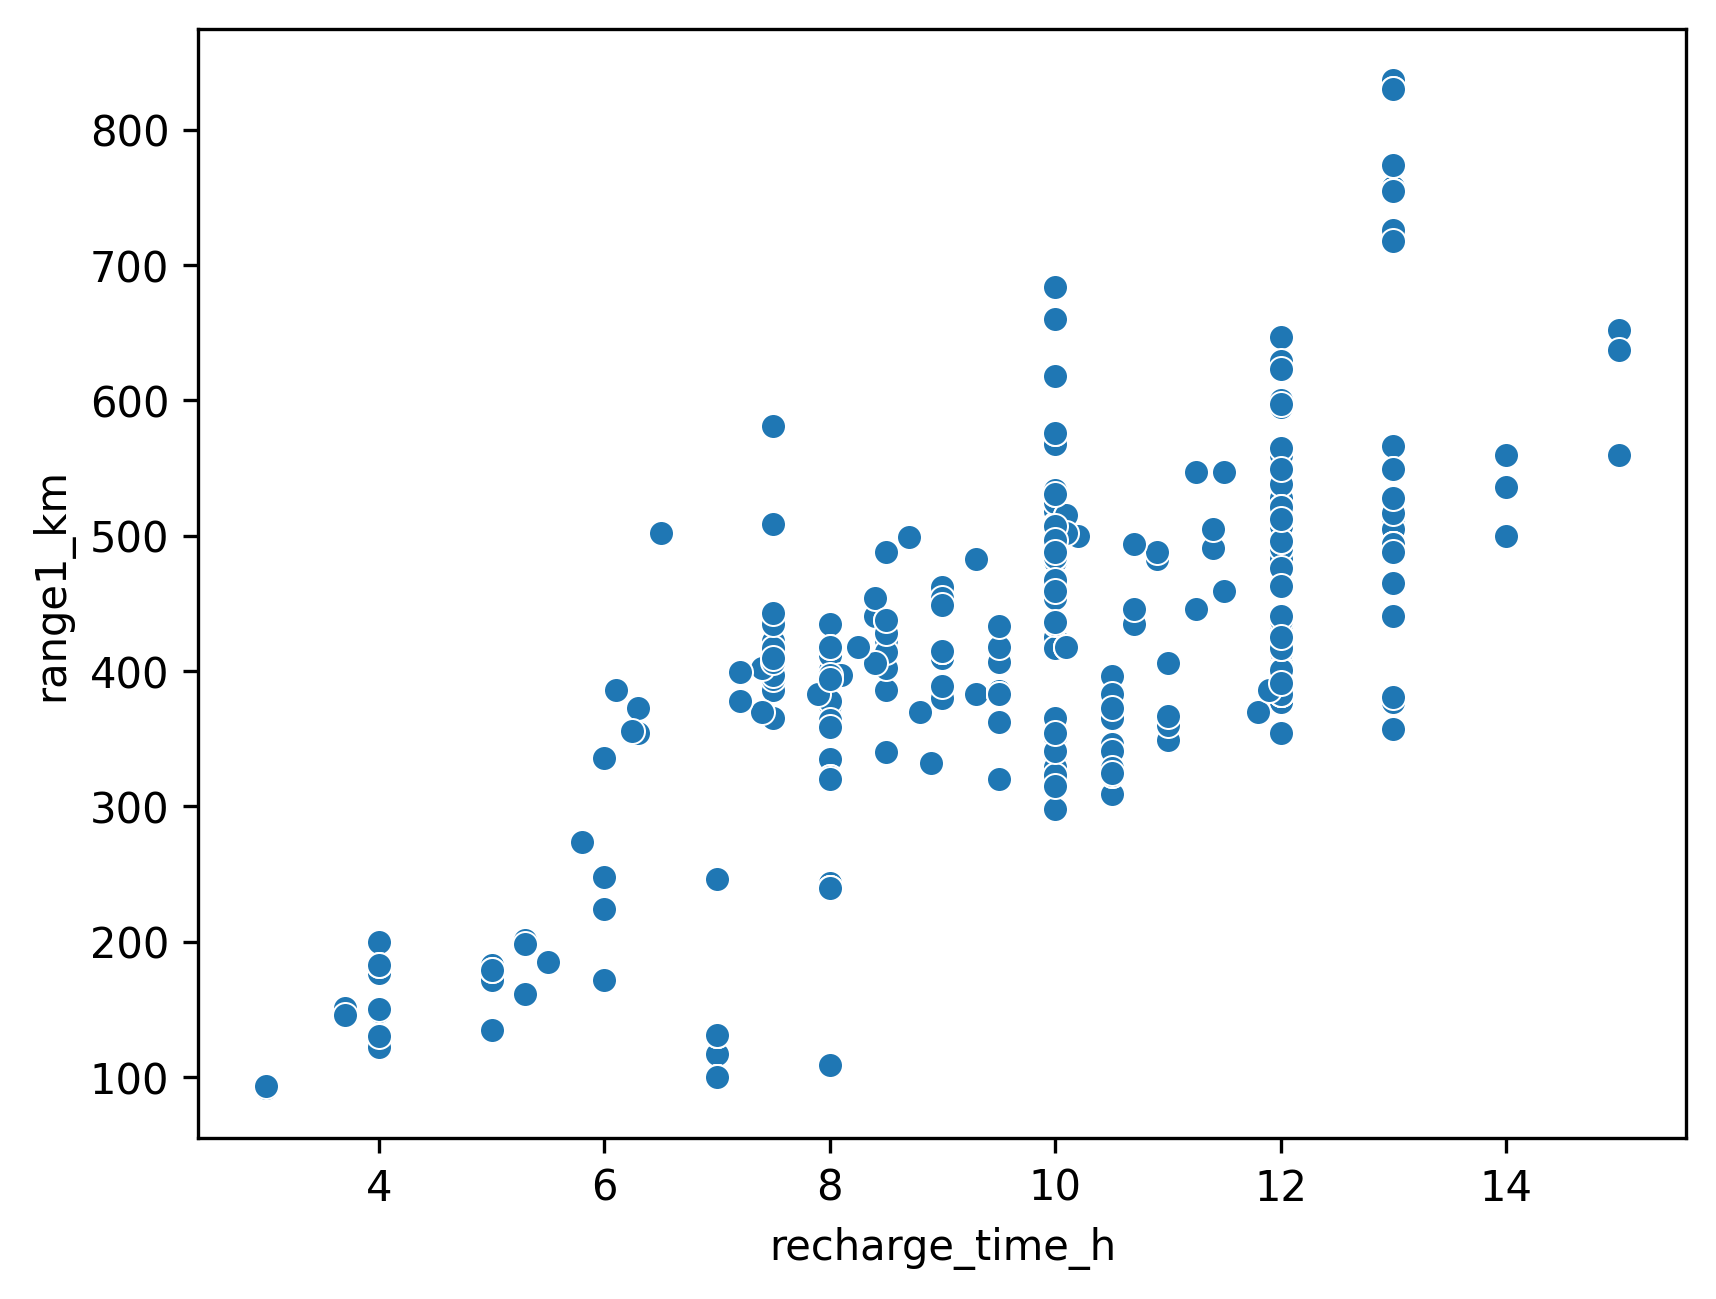

In [20]:
plt.rcParams["figure.dpi"] = 300  # high resolution

scatter_plt = sns.scatterplot(
    data=df, x="recharge_time_h", y="range1_km" #, hue="vehicleclass_" -> messy
)
print(type(scatter_plt))
plt.show()

# Query 3

## CTE

In [22]:
%%sql --save query_3_bar
SELECT DISTINCT vehicleclass_, vehicle_type, COUNT(id) AS num_vehicles
FROM all_vehicles
GROUP BY vehicleclass_, vehicle_type;

Running query in 'duckdb:///../data/database/car_data.duckdb'

vehicleclass_,vehicle_type,num_vehicles
full-size,fuel-only,1724
suv - small,fuel-only,1973
suv - standard,fuel-only,1295
compact,fuel-only,3783
mid-size,fuel-only,3505
minicompact,fuel-only,1086
two-seater,fuel-only,1460
subcompact,fuel-only,2595
station wagon - small,fuel-only,980
station wagon - mid-size,fuel-only,518


Save the CTE as a pandas `DataFrame()`:

In [23]:
result = %sql SELECT * FROM query_3_bar
df = result.DataFrame()

Generating CTE with stored snippets : 'query_3_bar'

Running query in 'duckdb:///../data/database/car_data.duckdb'

## Viz

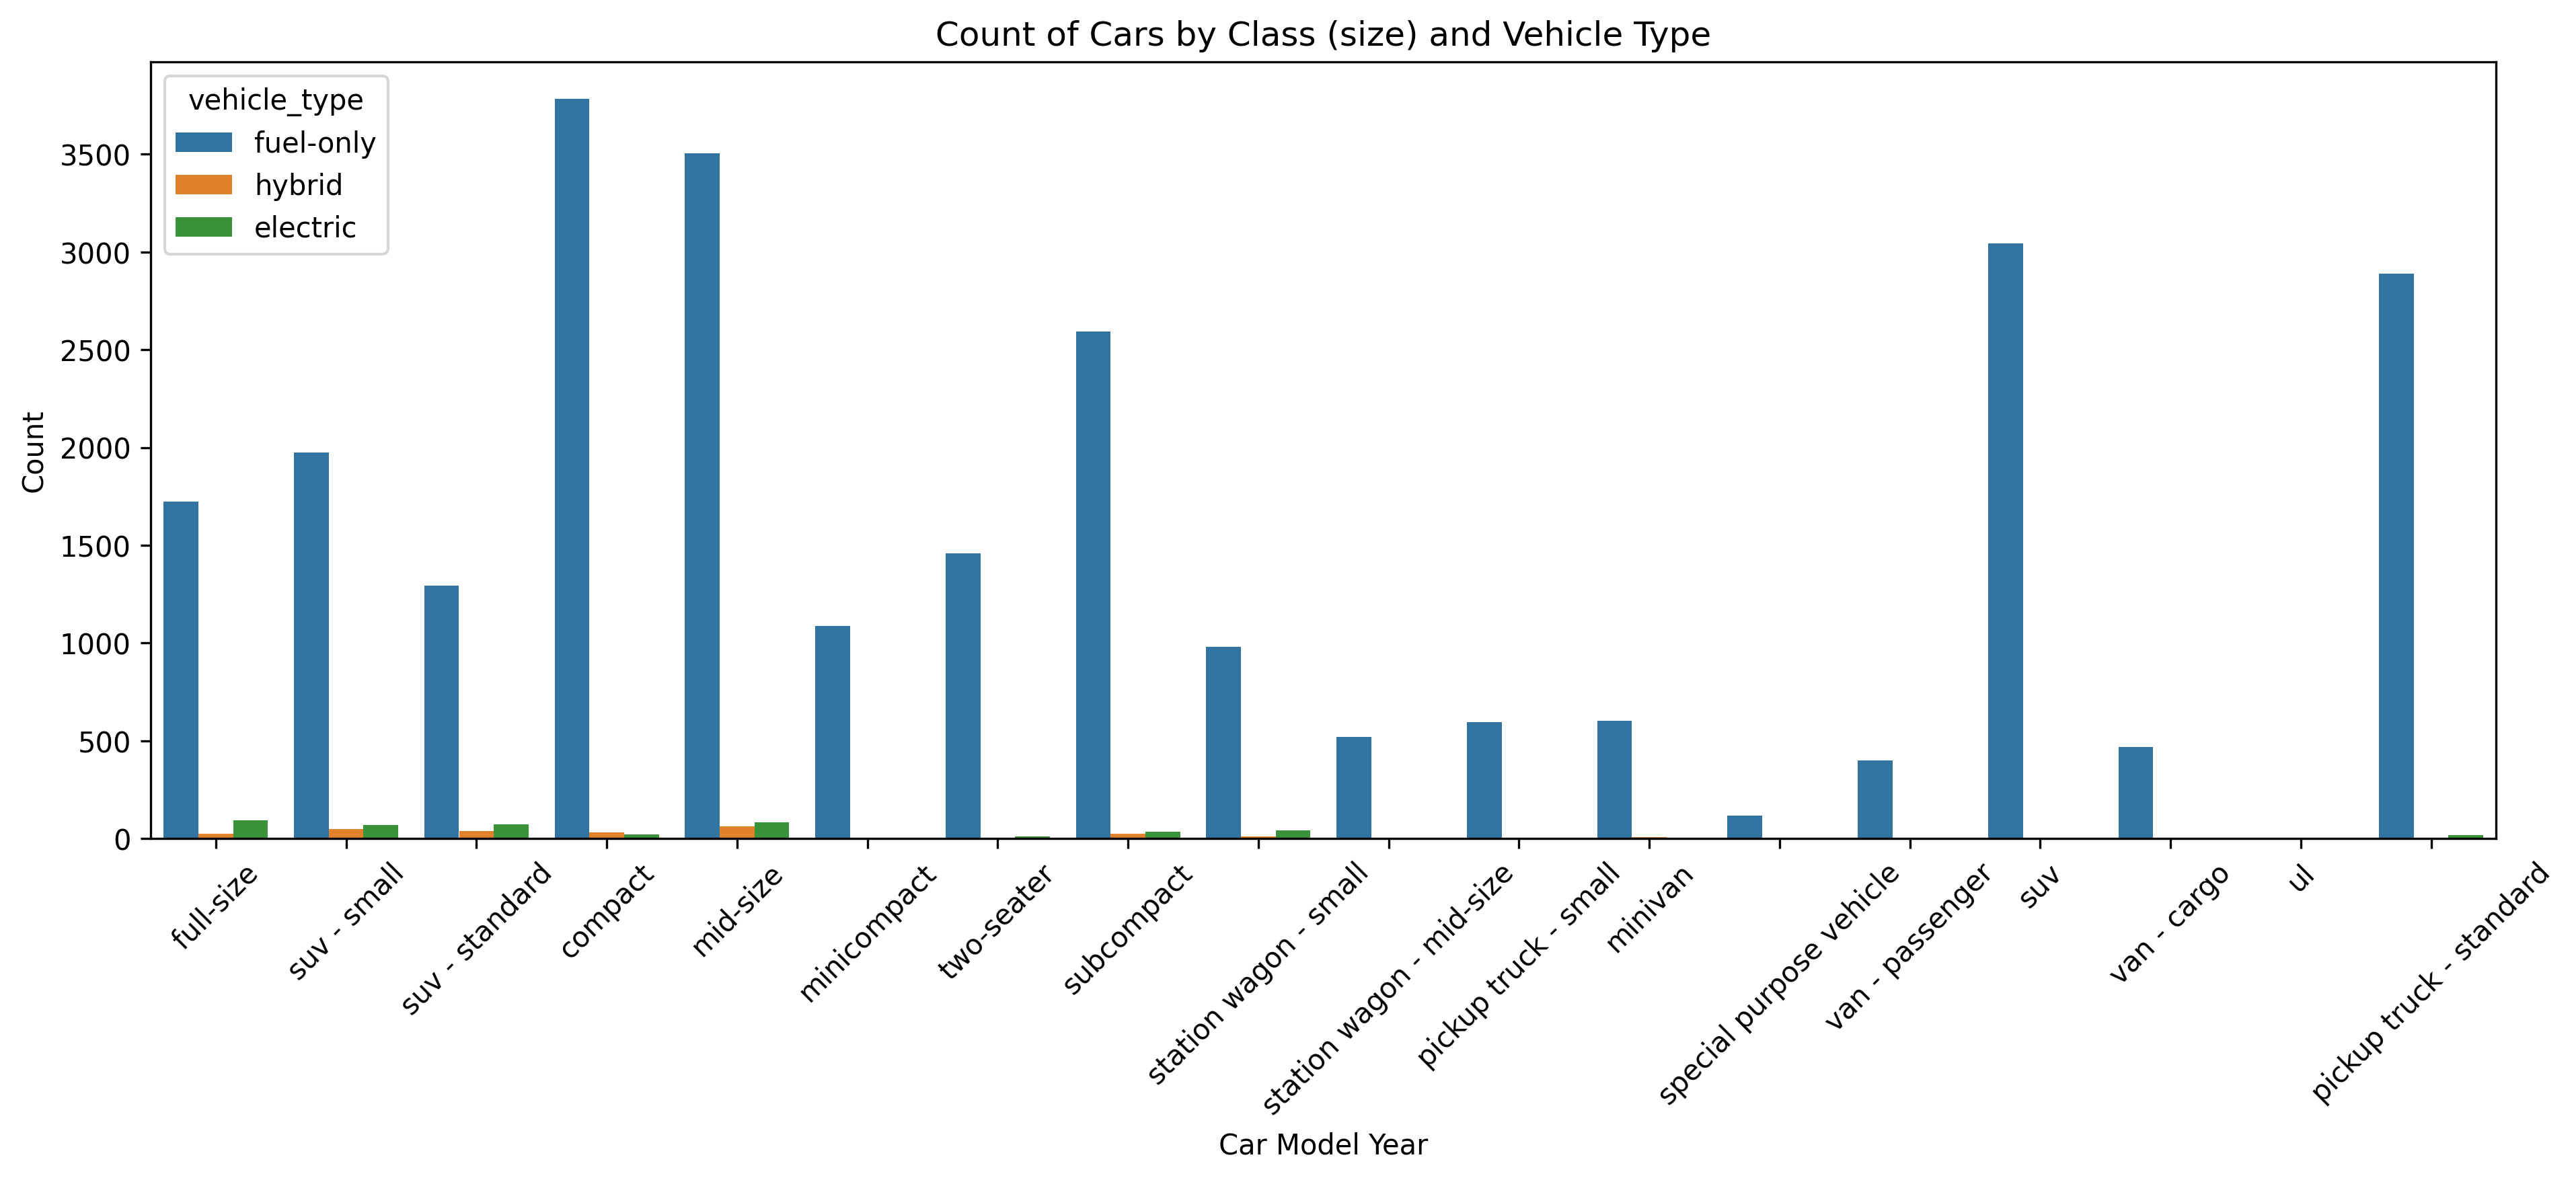

In [26]:
plt.figure(figsize=(15, 5), dpi=300)  # Initialize blank canvas
sns.barplot(data=df, x="vehicleclass_", y="num_vehicles", hue="vehicle_type")
plt.xlabel("Car Model Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Count of Cars by Class (size) and Vehicle Type")
plt.show()

# Query 4

## CTE

In [27]:
%%sql --save query_4_scatter
SELECT fuelconsumption_comb_mpg, co2emissions_g_km, enginesize_l
FROM fuel

Running query in 'duckdb:///../data/database/car_data.duckdb'

fuelconsumption_comb_mpg,co2emissions_g_km,enginesize_l
39,167,1.5
38,172,1.5
36,181,1.5
25,263,3.5
23,291,3.0
29,232,2.0
27,242,2.0
29,230,2.0
29,231,2.0
26,256,3.0


In [28]:
result = %sql SELECT * FROM query_4_scatter
df = result.DataFrame()

Generating CTE with stored snippets : 'query_3_bar'

Running query in 'duckdb:///../data/database/car_data.duckdb'

/Users/Tegveer/miniforge3/envs/sqlcourse/lib/python3.10/site-packages/sql/run.py:736: JupySQLDataFramePerformanceWarning: It looks like you're using DuckDB with SQLAlchemy. For faster conversions, use  a DuckDB native connection. Docs: https://jupysql.ploomber.io/en/latest/integrations/duckdb.html. to suppress this warning, see: https://jupysql.ploomber.io/en/latest/tutorials/duckdb-native-sqlalchemy.html#supress-warnings
  warnings.warn(


## Viz

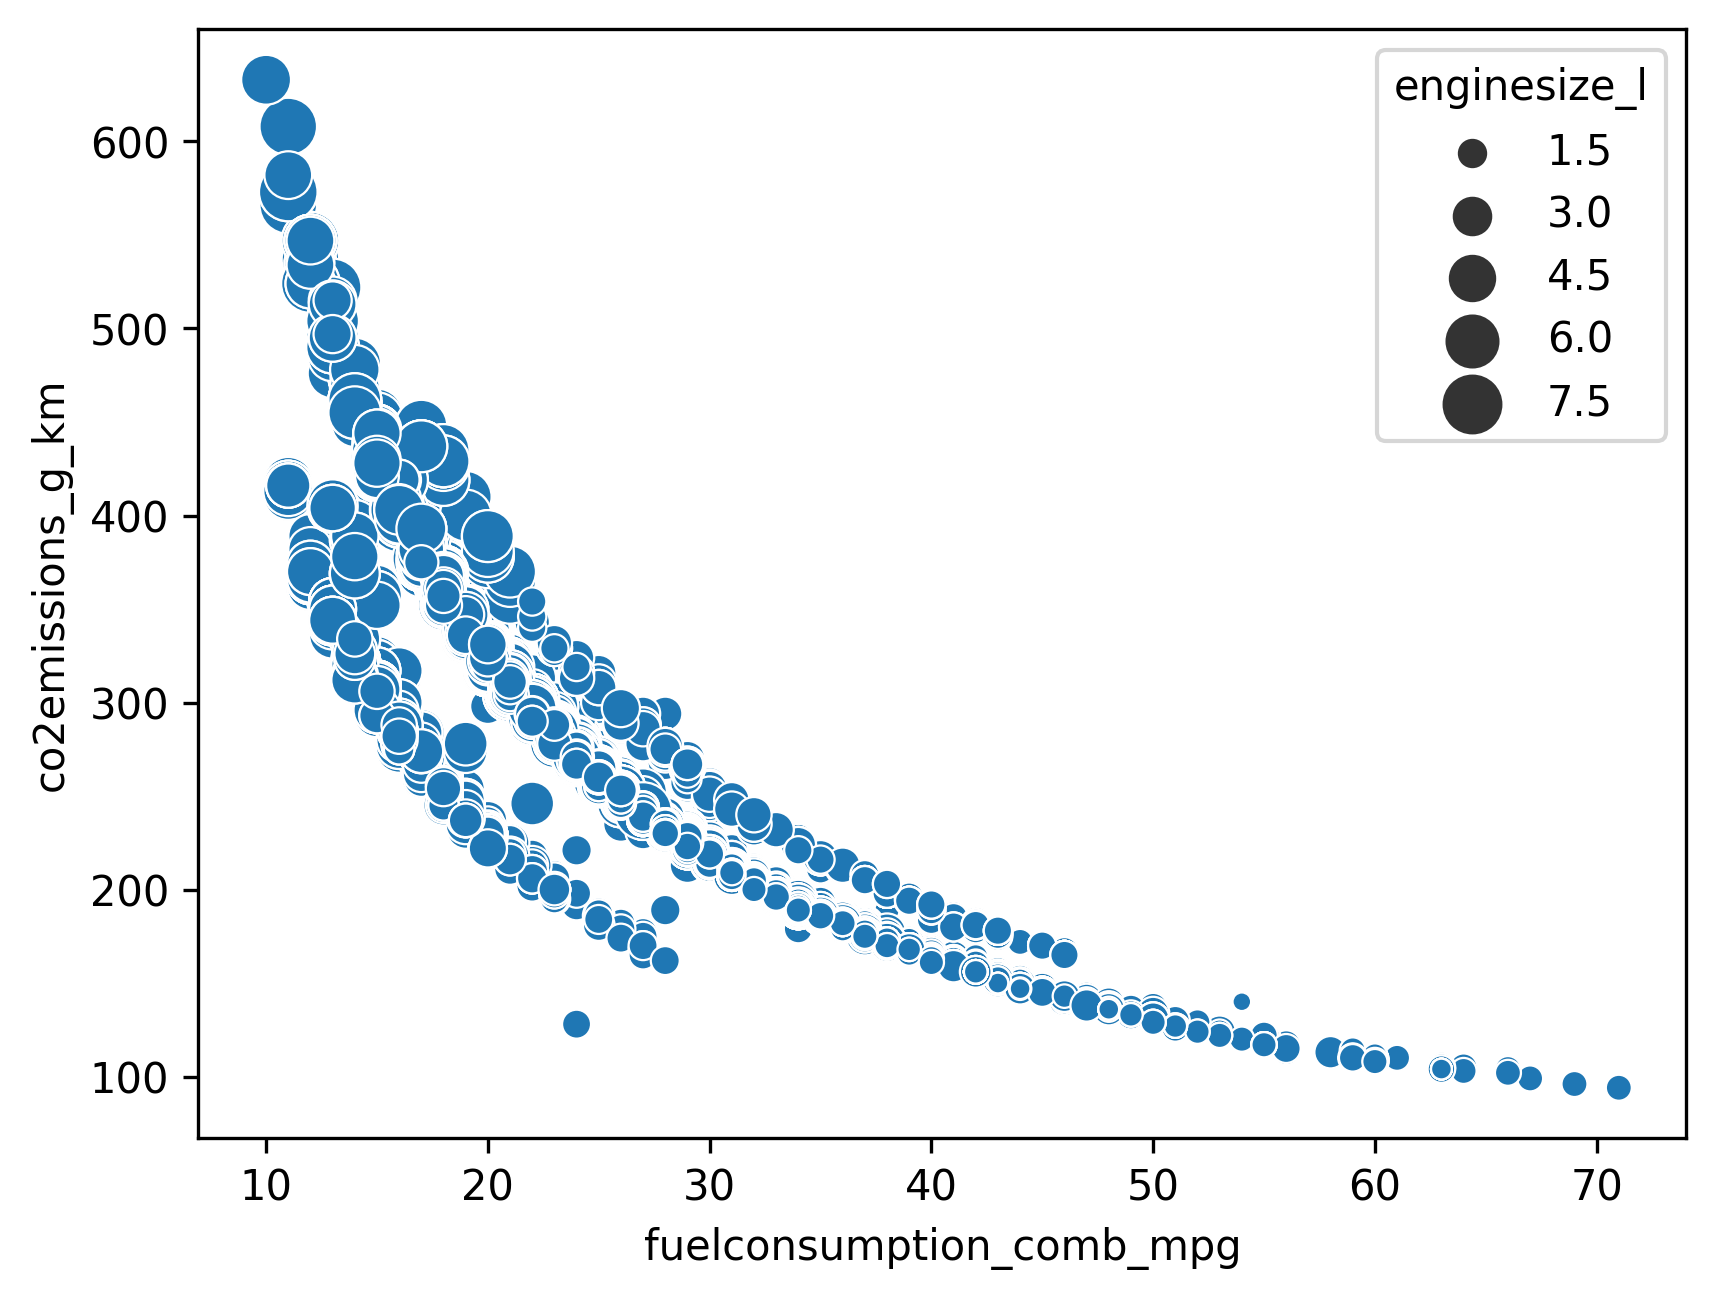

In [30]:
plt.rcParams["figure.dpi"] = 300  # high resolution

scatter_plt = sns.scatterplot(
    data=df, x="fuelconsumption_comb_mpg", y="co2emissions_g_km",
    size="enginesize_l", sizes=(20, 200) )
plt.show()

# Query 5

## CTE

In [ ]:
%%sql --save query_5_box
SELECT fuelconsumption_comb_mpg, co2emissions_g_km, enginesize_l
FROM fuel

In [ ]:
result = %sql SELECT * FROM query_5_box
df = result.DataFrame()

# Viz